In [2]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

In [3]:
# Load the Wine dataset
wine_data = load_wine()
X = wine_data.data
y = wine_data.target
feature_names = wine_data.feature_names
class_names = wine_data.target_names

In [4]:
# Convert to a DataFrame for easier manipulation
df = pd.DataFrame(X, columns=feature_names)
df['class'] = y

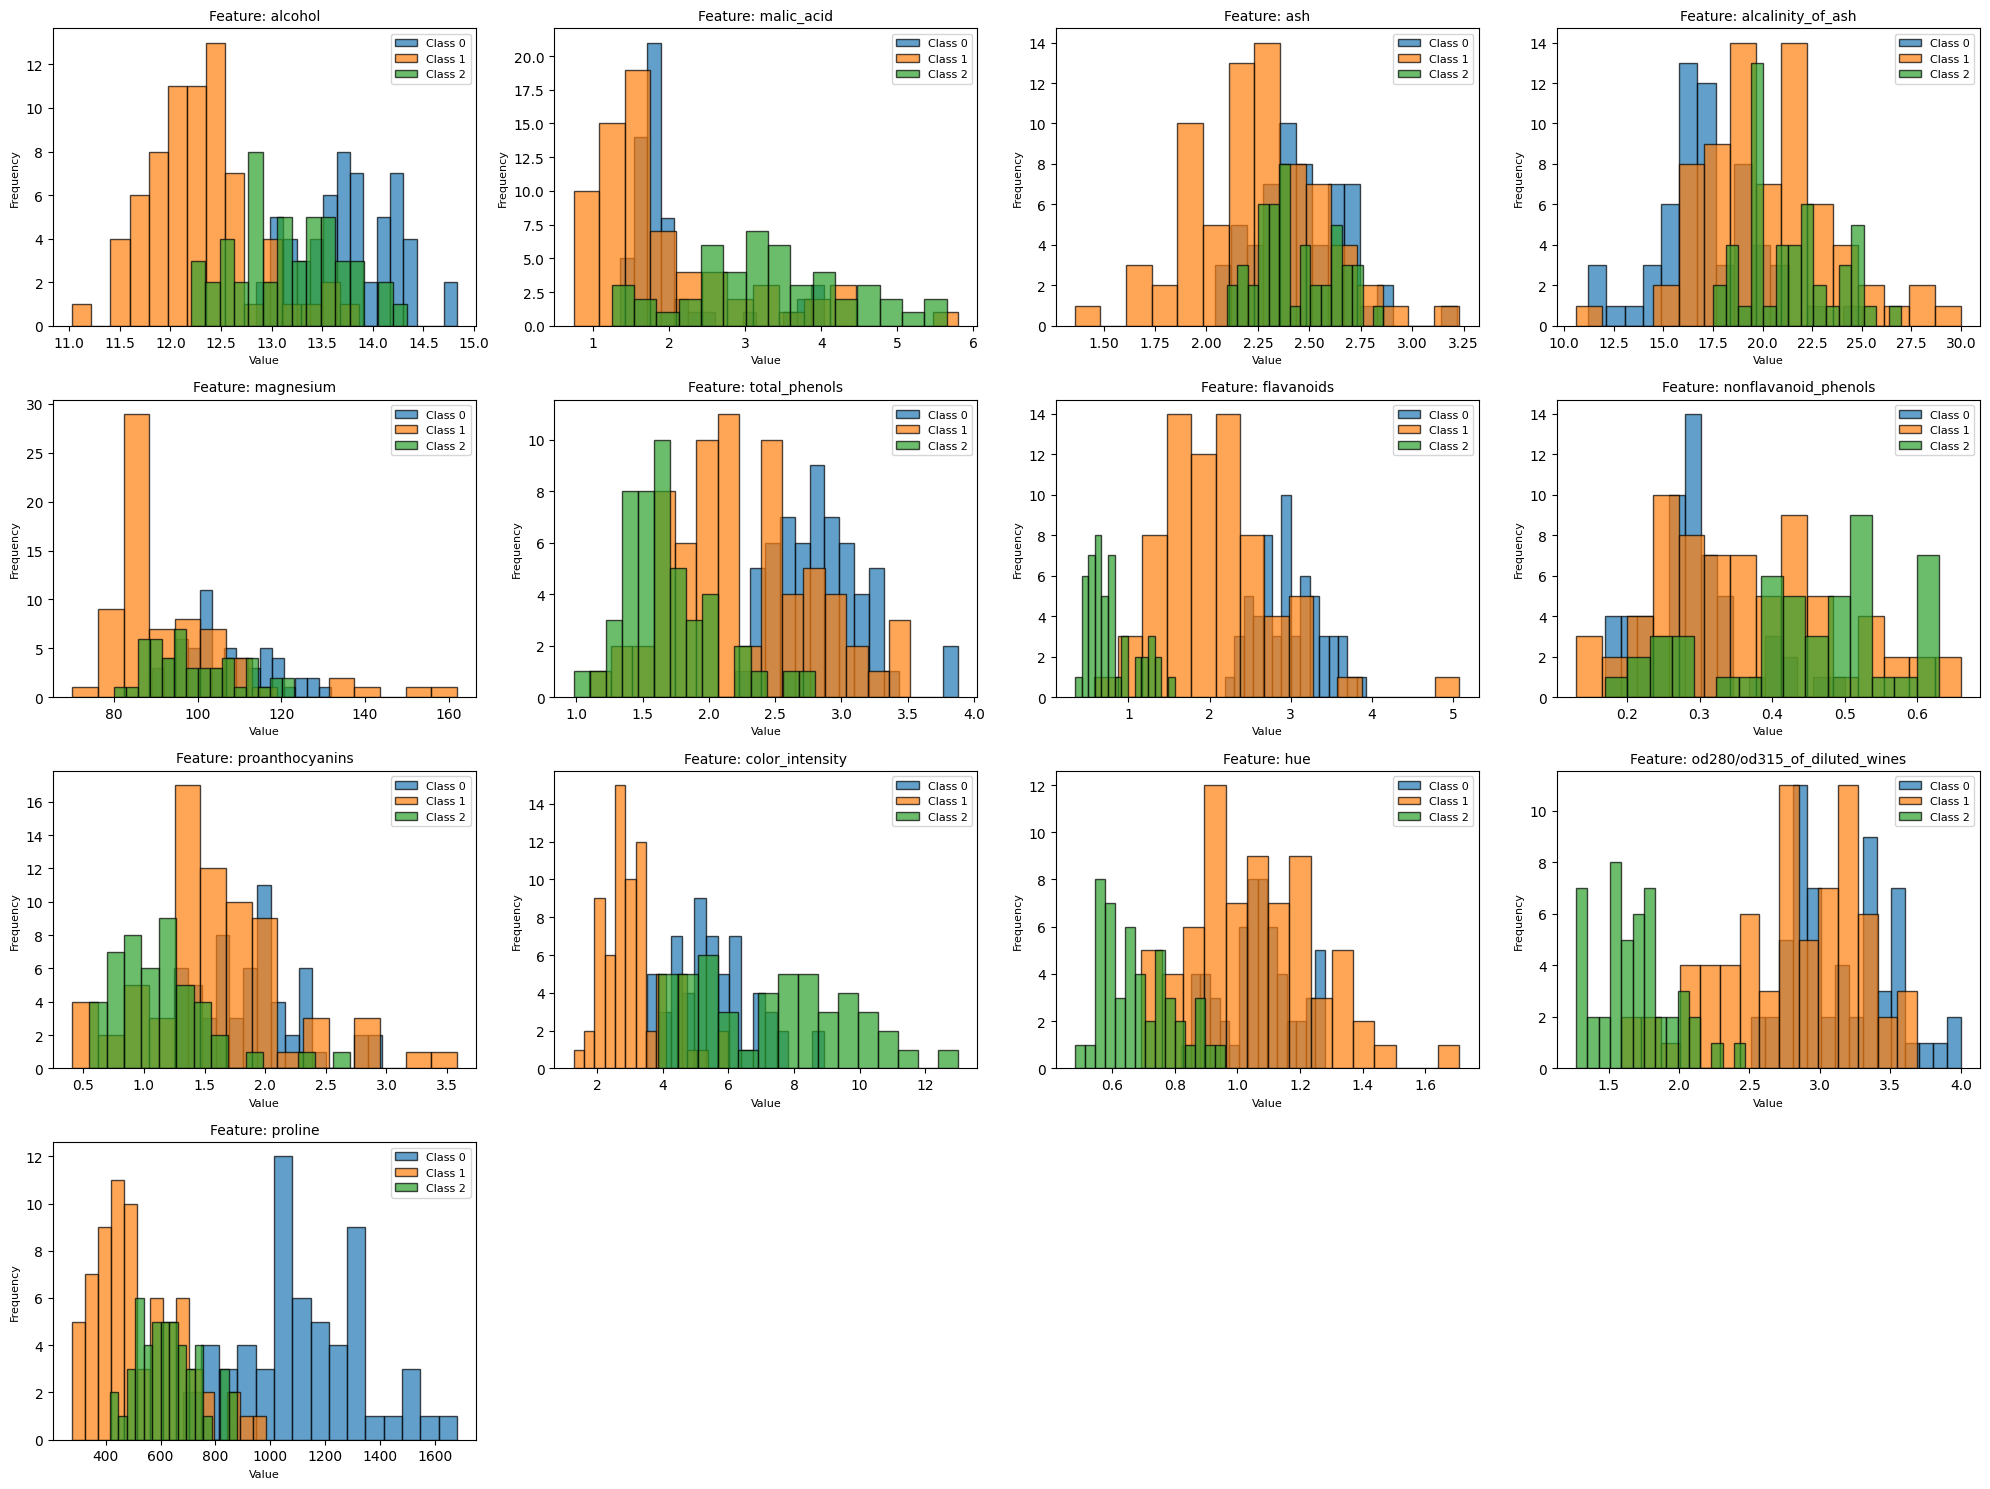

In [5]:
# Plot histograms for each feature, separated by class
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 15))
axes = axes.flatten()

# Plot each feature's histogram
for i, feature in enumerate(feature_names):
    for class_value in np.unique(y):
        subset = df[df['class'] == class_value]
        axes[i].hist(subset[feature], bins=15, alpha=0.7, label=f"Class {class_value}", edgecolor='black')
    axes[i].set_title(f"Feature: {feature}", fontsize=10)
    axes[i].set_xlabel("Value", fontsize=8)
    axes[i].set_ylabel("Frequency", fontsize=8)
    axes[i].legend(fontsize=8)

# Remove extra subplots for unused slots
for i in range(len(feature_names), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout for clarity
fig.tight_layout()
plt.show()

## 2- LDA AND KNN
### LDA

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=0)

In [7]:
# feature scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
# performing LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [9]:
# training and making predictions

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [10]:
# evaluating the performance

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))


[[12  2  0]
 [ 2 14  0]
 [ 0  1  5]]
Accuracy0.8611111111111112


### KNN

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# KNN Classifier Implementation

knn1 = KNeighborsClassifier(n_neighbors=1)
knn3 = KNeighborsClassifier(n_neighbors=3)
knn5 = KNeighborsClassifier(n_neighbors=5)
knn10 = KNeighborsClassifier(n_neighbors=10)
knn15 = KNeighborsClassifier(n_neighbors=15)
knn20 = KNeighborsClassifier(n_neighbors =20)

In [13]:
# Predictions for the KNN Classifiers

knn1.fit(X_train, y_train)
knn3.fit(X_train, y_train)
knn5.fit(X_train, y_train)
knn10.fit(X_train, y_train)
knn15.fit(X_train, y_train)
knn20.fit(X_train, y_train)

y_pred1 = knn1.predict(X_test)
y_pred3 = knn3.predict(X_test)
y_pred5 = knn5.predict(X_test)
y_pred10 = knn10.predict(X_test)
y_pred15 = knn15.predict(X_test)
y_pred20 = knn20.predict(X_test)

In [14]:
# Predict Accurace for K values

from sklearn.metrics import accuracy_score
print("Accuracy with k=1", accuracy_score(y_test, y_pred1)*100)
print("Accuracy with k=3", accuracy_score(y_test, y_pred3)*100)
print("Accuracy with k=5", accuracy_score(y_test, y_pred5)*100)
print("Accuracy with k=10", accuracy_score(y_test, y_pred10)*100)
print("Accuracy with k=15", accuracy_score(y_test, y_pred15)*100)
print("Accuracy with k=20", accuracy_score(y_test, y_pred20)*100)


Accuracy with k=1 88.88888888888889
Accuracy with k=3 83.33333333333334
Accuracy with k=5 83.33333333333334
Accuracy with k=10 86.11111111111111
Accuracy with k=15 83.33333333333334
Accuracy with k=20 80.55555555555556


# 3- Bayesian Approach

In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implement a Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [20]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

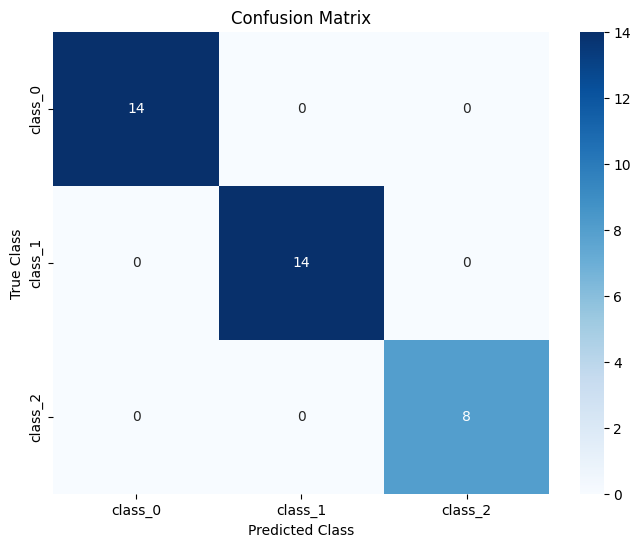

Classification Report:
               precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        14
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Accuracy: 100.00%


In [21]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Print classification report
class_report = classification_report(y_test, y_pred, target_names=class_names)
print("Classification Report:\n", class_report)

# Print accuracy
print(f"Accuracy: {accuracy * 100:.2f}%")
